### Library import

In [3]:
# library import
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Mdf_5year로 진행

In [4]:
Mdf = pd.read_csv('Mdf_6label.csv')

In [5]:
Mdf = Mdf.replace({'bankruptcy':-5},{'bankruptcy':0})
#Mdf = Mdf.replace({'bankruptcy':1},{'bankruptcy':1})
Mdf = Mdf.replace({'bankruptcy':2},{'bankruptcy':1})
Mdf = Mdf.replace({'bankruptcy':3},{'bankruptcy':1})
Mdf = Mdf.replace({'bankruptcy':4},{'bankruptcy':1})
Mdf = Mdf.replace({'bankruptcy':5},{'bankruptcy':1})

In [6]:
idx=Mdf[Mdf['bankruptcy']==-1].index
Mdf.drop(idx,inplace=True)
idx=Mdf[Mdf['bankruptcy']==-2].index
Mdf.drop(idx,inplace=True)
idx=Mdf[Mdf['bankruptcy']==-3].index
Mdf.drop(idx,inplace=True)
idx=Mdf[Mdf['bankruptcy']==-4].index
Mdf.drop(idx,inplace=True)

### Over Sampling

In [7]:
Mdf_columns = list(Mdf.columns.difference(['bankruptcy'])) # price-target, 그 외 feature
X = Mdf[Mdf_columns]
y = Mdf['bankruptcy'].to_frame()

Text(0.5, 1.0, 'Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

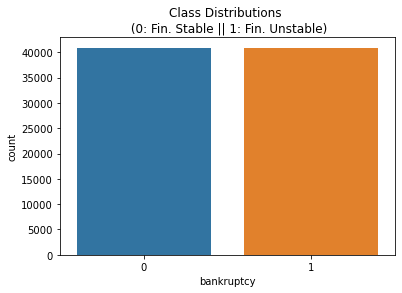

In [8]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
X, y = smote.fit_resample(X, y)

sns.countplot(x=y['bankruptcy'])
plt.title('Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)')

In [9]:
Mdf

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,bankruptcy
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42939,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
42940,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
42941,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1
42942,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1


### Xgboost 학습

In [10]:
# xgboost 구현하여 shap value를 예측할 것

# library
import xgboost as xgbm
# xgboost model 학습
model = xgbm.XGBRegressor().fit(X, y) # 학습

### Shap

In [11]:
import skimage
import shap
from math import sqrt
from sklearn.metrics import mean_squared_error

In [12]:
# shap을 사용한 모델 예측 설명
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

100%|===================| 81792/81822 [19:11<00:00]        

#### Waterfall

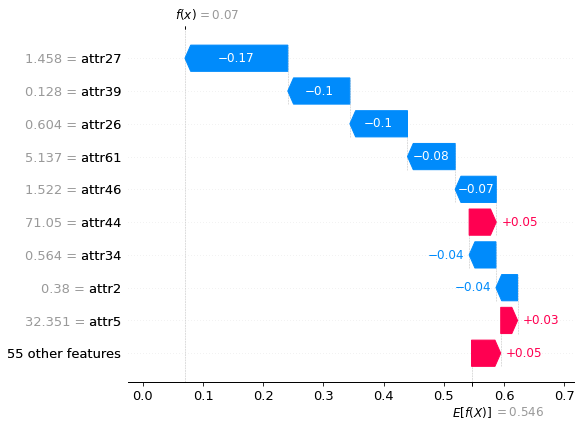

In [13]:
# 예측 설명 시각화
shap.plots.waterfall(shap_values[0])

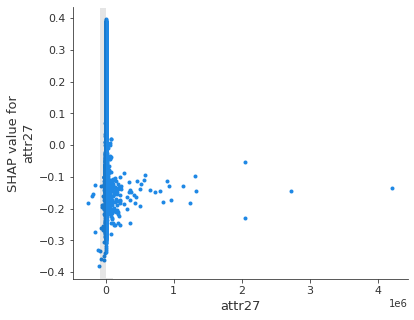

In [14]:
shap.plots.scatter(shap_values[:,"attr27"])


위 자료는 기본 값(학습 데이터 세트에 대한 평균 모델 결과 값)으로부터 산출된 모델 결과를 최종 모델 결과로 산출하는 것에 대한 변수들의 공헌도를 보여준다. 예측을 높게 해주는 변수는 빨간색, 예측을 낮게해주는 변수는 파란색.

> 우리 모델에 대한 해석

attr27의 값이 1.039인 경우, 이 기업이 파산할 확률이 극적으로 감소합니다.

#### force

In [15]:
shap.initjs()
shap.plots.force(shap_values[0])

조금 다른 시각화. 빨간색이 영향도가 높은 것이고, 파란색이 영향도가 낮은 것이다.

#### importance

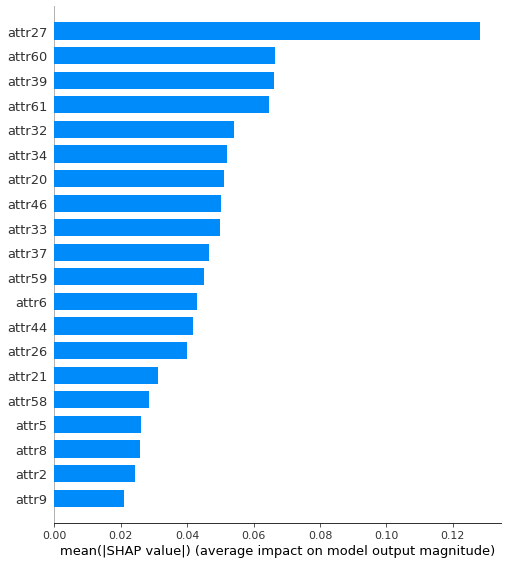

In [16]:
# 각 변수에 대한 |Shap Values|을 통해 변수 importance 파악
shap.summary_plot(shap_values, X, plot_type = "bar")

 이는 각 변수의 shap value에 절대값을 취한 것으로 변수의 평균적인 영향력을 보여준다. 큰 영향력을 보일 수록, target과 관계성(인과관계X)이 크다는 것이다. 즉, 변수의 중요도와 비슷한 개념이다. 
 
> 우리 모델에 대한 해석

관측치마다 중요도를 다 구해서 평균낸 것이다. 전반적으로 파산에 영향을 많이 준 가장 중요한 변수는 27번째 변수였다 !

#### Summary

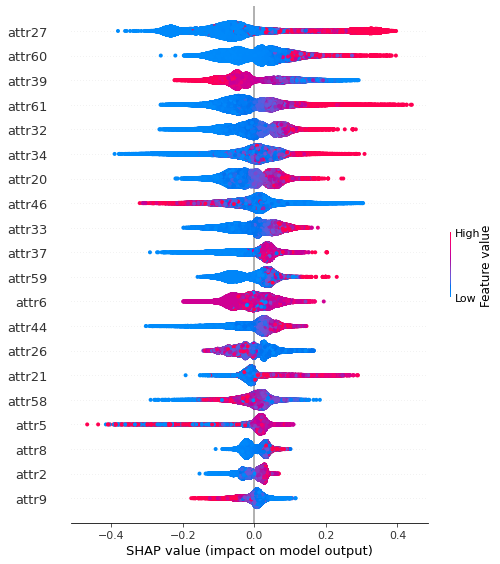

In [17]:
# summary
shap.summary_plot(shap_values, X)

> 우리 모델에 대한 해석

파산에 어떠한 변수들이 기여를 많이 했는지를 보여준다.
High Low 의미는 큰값이면 빨간색 작으면 파란색으로 표시됨.
X축은 shaply value 오른쪽으로 갈수록 큰값. 즉 파산에 더 큰 기여를 했다는 뜻.
가장 위 27번째 변수는 큰값일수록(빨간색일수록) shaply value가 커진다. 즉 해당 변수가 클수록 파산에 영향을 많이 미친다.
주목해야하는 29번째 변수 > 값이 작으면 shaply value는 커진다. = 즉, 값이 작을 때 파산에 영향을 많이 미친다. 